<a href="https://colab.research.google.com/github/rhqtmfajfl/python-study/blob/master/rhqtmfajfl/python-study/colab/06_%EC%95%99%EC%83%81%EB%B8%940615.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#랜덤포레스트 책 254 페이지

# 앙상블(Ensemble) 모델
머신러닝 앙상블이란? **여러개의 머신러닝 모델을 이용해 최적의 답을 찾아내는 기법**

* 여러 모델을 이용하여 데이터를 학습하고, 모든 모델의 예측결과를 **평균**하여 예측
  (핵심은 평균이다.)



## 앙상블 모델의 종류
* 보팅 (Voting) : 투표를 통해 결과를 도출
* 배깅 (Bagging) : 샘플 중복 생성을 통해 결과 도출
* 부스팅 (Boosting) : 이전 오차를 보완하면서 가ㅈ중치를 부여
* 스태킹(stacking) : 여러 모델을 기반으로 에측된 결과를 통해 **meta** 모델이 다시 한번 예측
 부하들을 통해 예측 모델을 만드는 것

## 데이터셋 로딩

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston

data = load_boston()

#데이터 프레임 생성

In [5]:
df = pd.DataFrame(
    data['data'],
    columns = data['feature_names']
)
df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Train/ Test Set 쪼개기

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df.drop('MEDV', 1),
    df['MEDV'],
    random_state=42
)

In [8]:
x_train.shape, y_train.shape

((379, 13), (379,))

In [9]:
#행을 잘못 drop 하면 y 트레인에서도 똑같은 행을 드랍해서 개수를 맞춰야 한다.
#x train에서 drop 했던것을 y트레인에서도 드랍해라

# 평가지표 만들기

## MSE( Mean Squared Error )
$$
\frac{1}{N}\sum_{i=1}^N(\hat{y_i} - t_i)^2
$$
예측값 $\hat{y}$와 실제값($t$)사이의 오차 **제곱**의 평균

In [10]:
#mse 예측값에서 타겟 값을 빼준다. 여기에 대한 평균을 낸다.

## MAE ( Mean Absolute Error )
$$
\frac{1}{N}\sum_{i=1}^N\left | \hat{y_i}-t_i  \right|
$$

예측값 $\hat{y}$와 실제값($t$)사이의 오차 **절대값**의 평균

## RMSE ( Root Mean Squared Error )
$$
\sqrt{\frac{1}{N}\sum_{i=1}^N(\hat{y_i} - t_i)^2}
$$

MSE에 root를 씌운 값

sklearn의 평가지표 활용하기

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error



## 모델별 성능확인을 위한 함수 추가

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## 단일 회귀에측 모델

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet



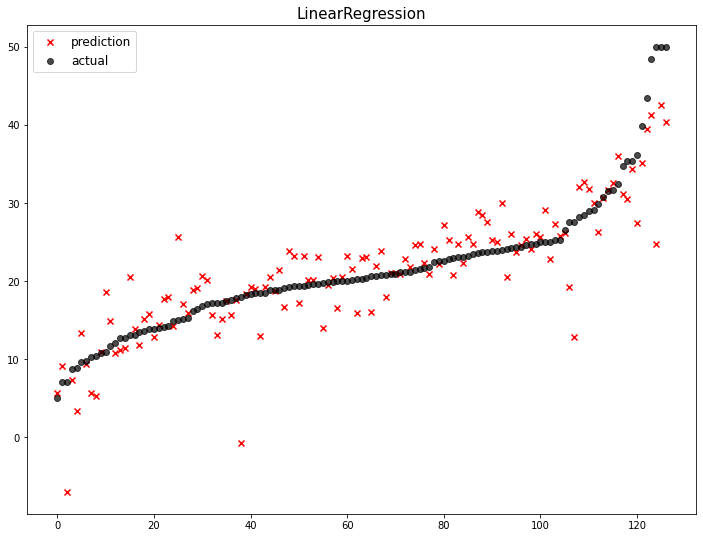

              model        mse
0  LinearRegression  22.098695


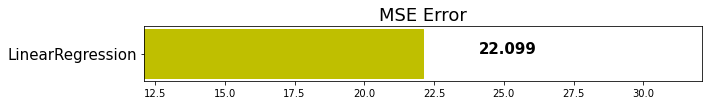

In [14]:
lin = LinearRegression()
lin.fit(x_train, y_train)

pred = lin.predict(x_test)
mse_eval('LinearRegression', pred, y_test)

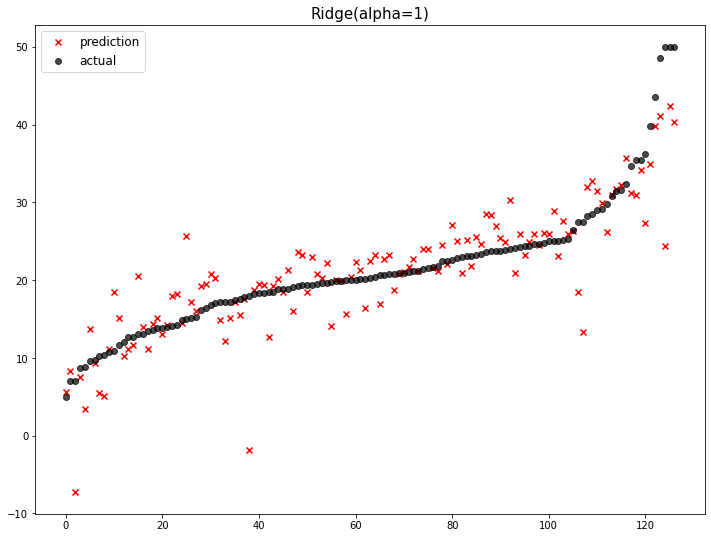

              model        mse
0    Ridge(alpha=1)  22.480476
1  LinearRegression  22.098695


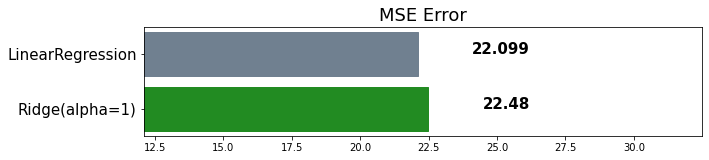

In [16]:
ridge = Ridge(alpha=1) #규제가 커지면 가중치가 작아진다.
#규제는 가중치를 누르는 압력이다.
ridge.fit(x_train, y_train)

pred = ridge.predict(x_test)
mse_eval('Ridge(alpha=1)', pred, y_test)

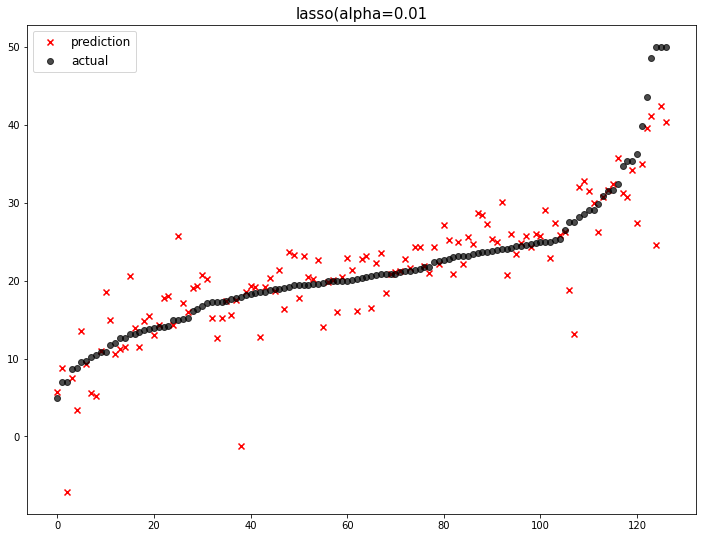

              model        mse
0    Ridge(alpha=1)  22.480476
1  lasso(alpha=0.01  22.210557
2  LinearRegression  22.098695


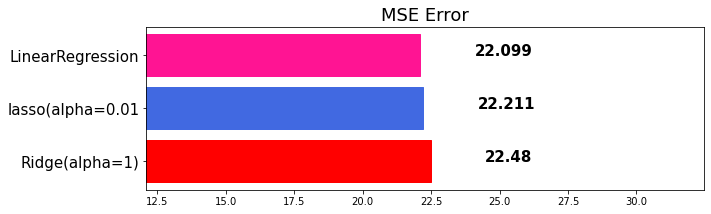

In [18]:
lasso = Lasso(alpha =0.01)

lasso.fit(x_train, y_train)

pred = lasso.predict(x_test)
mse_eval('lasso(alpha=0.01',pred, y_test) #과소 적합이 큰 모델이 된다.

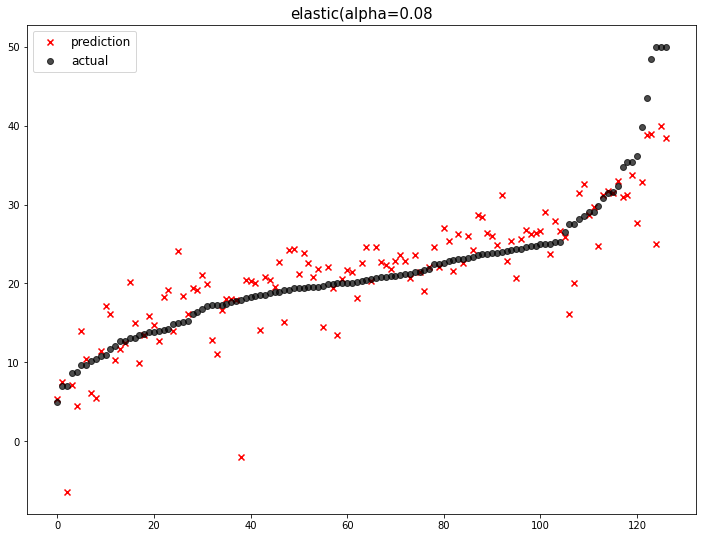

                model        mse
0  elastic(alpha=0.08  23.156236
1      Ridge(alpha=1)  22.480476
2    lasso(alpha=0.01  22.210557
3    LinearRegression  22.098695


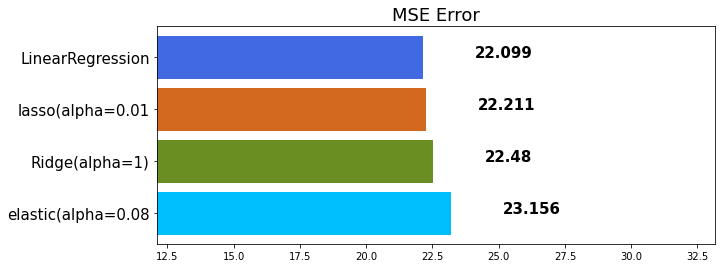

In [21]:
elastic = ElasticNet(alpha=0.5, l1_ratio=0.8)  #ratio가 작을 수록 l2에 가까워져서 영향을 주고 클수록 l1에 영향을 준다.
elastic.fit(x_train, y_train)

pred = elastic.predict(x_test)
mse_eval('elastic(alpha=0.08',pred, y_test)

## 앙상블(ensemble)

## 1. 보팅(voting)

**투표를 통해 결정하는 방식**

* voting은 서로 다른 알고리즘 모델을 조합해서 사용
* Bagging은 같은 알고리즘 내에서 다른 샘플 조합을 사용

In [22]:
#모든 모델은 classification 도 가능
#선형모델은 회귀밖에 없다.
#릿지 라소 엘라스틱 넷 은 회귀밖에 없다.

#여러 곳에 다 classifier가 있다. 

In [23]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

반드시 **Tuple 형태로 모델을 정의**

In [24]:
#모델앞에는 사용하고 싶은 이름을 써놓으면 더;ㄴ디/

In [28]:
# single_models = [
#   ('linear_reg', lin),    #앞에는 모델이름 뒤에는 모델 객체를넣는다.
#   ('my_ridge', ridge),
#   ('your_lasso', lasso),
#   ('our_elastic', elasitc_net)
# ]

# voting_regressor= VotingRegressor(
#     single_models,
#     n_jobs= -1 #여기서는 gpu 못씀
# )

# voting-regressor.fit(x_train,y_train) 
single_models = [
  ('linear_reg', lin),
  ('my_ridge', ridge),
  ('your_lasso', lasso),
  ('our_elastic', elastic)
]

voting_regressor = VotingRegressor(
    single_models,
    n_jobs = -1
)

In [32]:
voting_regressor.fit(x_train, y_train)

VotingRegressor(estimators=[('linear_reg',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('my_ridge',
                             Ridge(alpha=1, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001)),
                            ('your_lasso',
                             Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False)),
                            ('our_elastic',
                             ElasticNet(alpha=0.5, cop

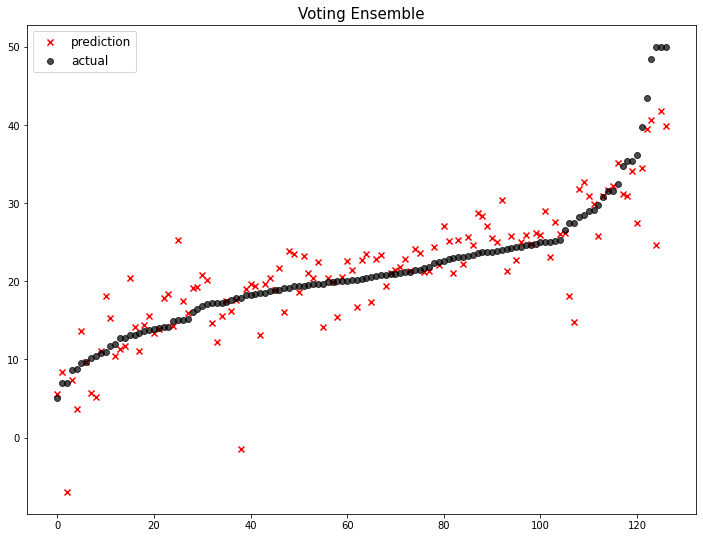

                model        mse
0  elastic(alpha=0.08  23.156236
1      Ridge(alpha=1)  22.480476
2    lasso(alpha=0.01  22.210557
3    LinearRegression  22.098695
4     Voting Ensemble  22.040224


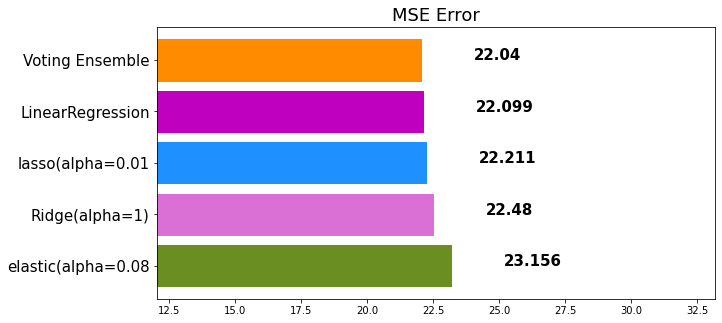

In [34]:
voting_pred = voting_regressor.predict(x_test)
mse_eval("Voting Ensemble", voting_pred, y_test) #모델에 대한 시각화

In [35]:
#voting ensemble은 여러개 중에 괜찮은 것을 사용한것이다. 다른 모델들에 대해 의존한다.

## 2. 보팅(Voting) 분류 (Classification)
`voting={'hard', 'soft'}` 하이퍼 파라미터가 제일 중요!

* **hard voting**
  * 결과 값에 대한 다수 class를 차용
  * 분류에 대한 예측값이 `[1,1,0,0,1]` 나온 경우 `1`번 클래스로 예측한게 다수니까 `1`로 결정 된다.

* **soft voting**
  * 각 클래스의 확률의 평균 값을 계산하고, 그 평균값이 가장 높은 값으로 차용
  * 5개의 모델을 앙상블해서 나온 클래스 0이 나올 확률 : `[0.4, 0.9, 0.9, 0.4, 0.4]`
    * 0번 클래스로 결정될 평균 확률 : `(0.4 + 0.9 + 0.9 + 0.4 + 0.4) / 5 = 0.6`
  * 5개의 모델을 앙상블해서 나온 클래스 1이 나올 확률 : `[0.6, 0.1, 0.1, 0.6, 0.6]`
    * 1번 클래스로 결정될 평균 확률 : `(0.6 + 0.1 + 0.1 + 0.6 + 0.6) / 5 = 0.40`

    예시로 나온것 하지만 실제로는 두개의 합은 1이 나온다.
    평균을 구한 값은 1이 나오지 않을 수도 있다. 각각의 합은 1이 나온다.

    0번 모델이 확률 1번의 확률을 가각의 확률을 구하면 1이다.

In [41]:
#하드 보팅과 소프트 보팅
#하드보팅은 예를 들어 1이 세개 0이 두개 면 1로 결정이 된다.
#결정확률을 클래스벼로 구한다.

In [42]:
#소프트 보팅은 각 갑들의 평균을 구한다.


In [43]:
#확률이 높아질수록 이클래스로 분류가 될거이다라는 확률이다.
#x로 분류될 확률은 0.1이다.
#1은 전체에서 동그라미로 결정될 확률을 빼면 x로 결정될 확률이 나온다.

In [44]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

models = [
          ('logistic', LogisticRegression),
          ('svc', SVC())
]

vc = VotingClassifier(models, voting='hard')
vc = VotingClassifier(models, voting='soft')


In [45]:
#VOTING

## 배깅(Bagging)

bagging  : bootstrap aggregating의 줄임말
* bootstrap = sample + aggregation = 합산

bootstrap은 여러개의 데이터 세트를 중첩을 : 허용하게 하여 샘플링을 분할하는 방식

## 부트스트랩 샘플링
원본 데이터 세트의 구성이 `[1,2,3,4,5]` -> `feature가 1,2,3,4,5`

1. group 1 = `[1,2,3]`
2. group 2 = `[3,4,5]`
3. group 3 = `[2,3,5]`

위 처럼 선택된 샘플을 이용해서 모델을 만드는 방식 - Bagging

**Voting VS Bagging**
* Voting은 여러 알고리즘의 조합에 대한 앙상블
* Bagging은 하나의 단일 알고리즘에 대하여 여러 개의 샘플 조합으로 앙상블

In [46]:
#배깅의 대표적인 것 랜덤포레스트 알고리즘 

In [47]:
#랜덤 포레스트알고리즘에 대해서

## RandomForest
* DecisionTree 기반 Bagging 앙상블
* 굉장히 인기 있는 알고리즘
  - SNOW 어플의 초창기 버젼이 RandomForest로 만들어 졌음
* 사용하기도 쉽고, 성능도 우수하다.
- 랜덤 포레스트에서는스케일링이 필요가 없다.
예측ㅇㄹ 위해서 랜덤 포레스트 써도 된ㄷ.

In [49]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [50]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

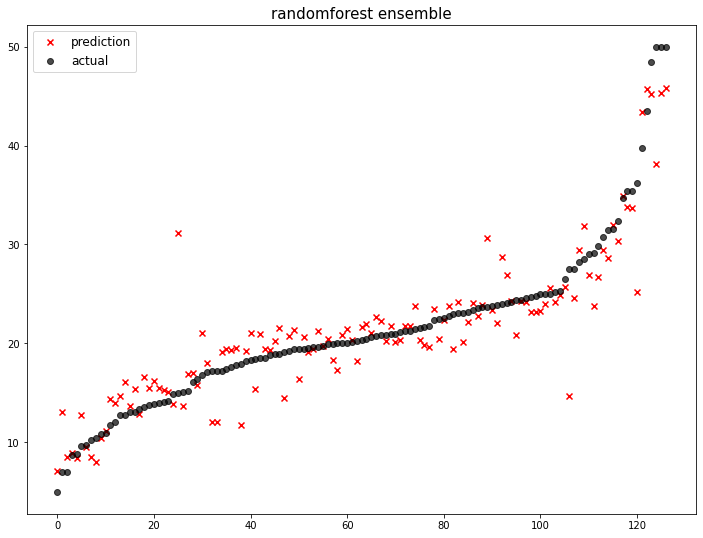

                   model        mse
0     elastic(alpha=0.08  23.156236
1         Ridge(alpha=1)  22.480476
2       lasso(alpha=0.01  22.210557
3       LinearRegression  22.098695
4        Voting Ensemble  22.040224
5  randomforest ensemble  10.572810


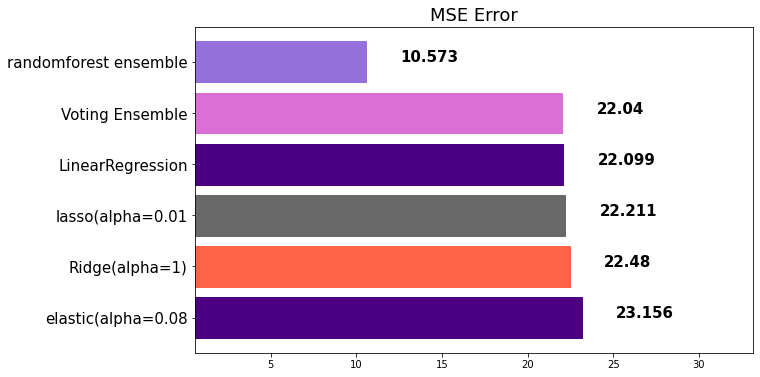

In [52]:
rfr_pred = rfr.predict(x_test)
mse_eval('randomforest ensemble', rfr_pred,y_test)

## Bagging Regressor

In [58]:
from sklearn.ensemble import BaggingRegressor
#배깅의 특징

bag_reg = BaggingRegressor(base_estimator= Lasso())
bag_reg

BaggingRegressor(base_estimator=Lasso(alpha=1.0, copy_X=True,
                                      fit_intercept=True, max_iter=1000,
                                      normalize=False, positive=False,
                                      precompute=False, random_state=None,
                                      selection='cyclic', tol=0.0001,
                                      warm_start=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                 random_state=None, verbose=0, warm_start=False)

## 부스팅(Bagging)

Weak Learner(약한학습기)를 여럭0 이어붙여서 점점 오차를 보관해 나가는 방식

*약한 학습기를 순차적으로 학습을 시켜서, 이전 학습에 대해서 잘못 예측한 데이터에 대해서 **가중치**를 부여해가면서 오차를 보완해나가는 방식

## 장점
  * 성능이 매우 우수하다.
## 단점
  * 오분류 / 잔차를 보완하려고 하기 때문에 잘못된 레이블링이나 아웃라이어에 필요 이상으로 민감하다.

  **
  * 다른 앙상블 기법대비 학습시간이 오래걸린다.

  




단점은 속도가 느리다.
아웃라이어에 굉장히 민갑하다.
잘못 불류된 아웃라이어에 민감
아웃라이어가 없으면 괜찬다.

라소는 가중치

** 대표적인 Boosting 앙상블
1. AdaBoost
2. GradientBoost
3. LightBGM (LGBM)
4. XGBoost

##GradientBoost
* 성능이 제일우수함
* 학습시간이 너무 오래걸림
  - 모델배포를 위해 학습시간이 짧게 걸리는 것이 좋다.

  

In [59]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor



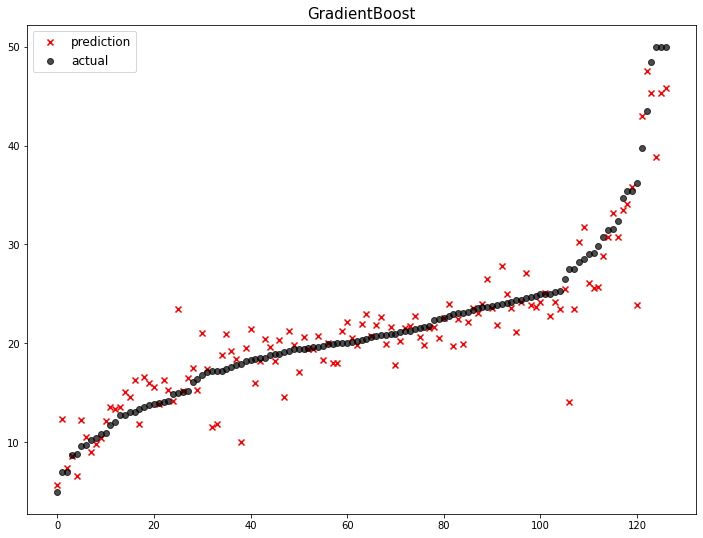

                   model        mse
0     elastic(alpha=0.08  23.156236
1         Ridge(alpha=1)  22.480476
2       lasso(alpha=0.01  22.210557
3       LinearRegression  22.098695
4        Voting Ensemble  22.040224
5  randomforest ensemble  10.572810
6          GradientBoost   8.956141


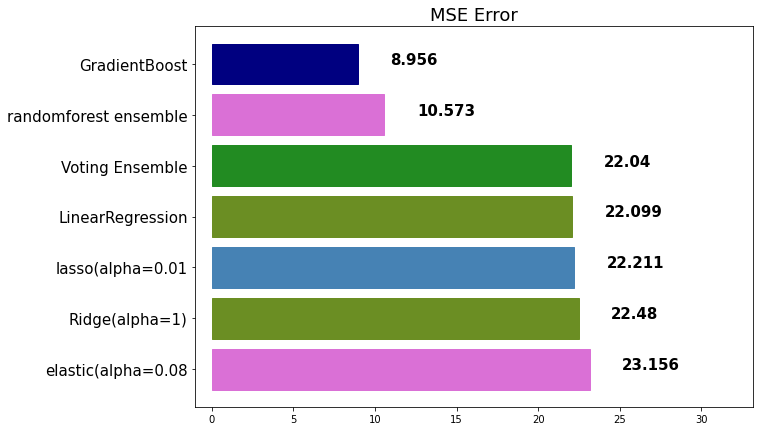

In [66]:
gbr = GradientBoostingRegressor(random_state= 42)
gbr.fit(x_train, y_train)

gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost', gbr_pred, y_test)

## XGBoost(eXtream Gradient Boosting)
* 사이킷런 패키지가 아님~
* 성능이 우수
* GBM 보다는 빠르고, 성능도 향상 되었다.
*학습시간은 여전히 느리다.

In [67]:
from xgboost import XGBRegressor, XGBClassifier


[02:19:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


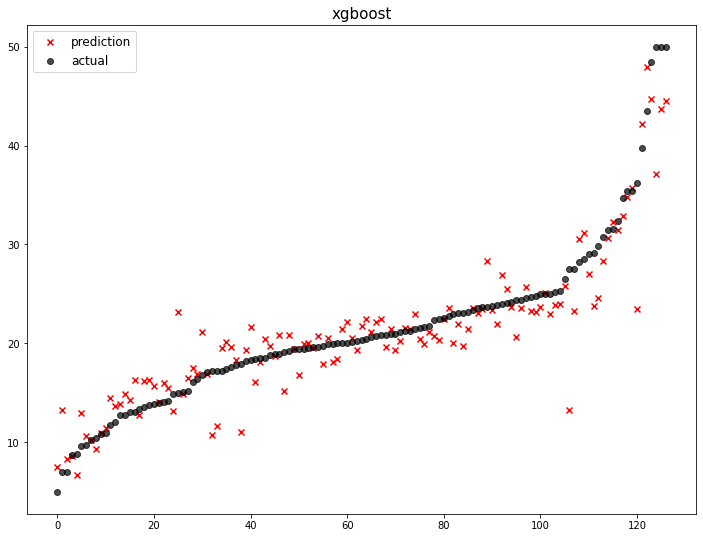

                   model        mse
0     elastic(alpha=0.08  23.156236
1         Ridge(alpha=1)  22.480476
2       lasso(alpha=0.01  22.210557
3       LinearRegression  22.098695
4        Voting Ensemble  22.040224
5  randomforest ensemble  10.572810
6          GradientBoost  10.118980
7                xgboost  10.118980


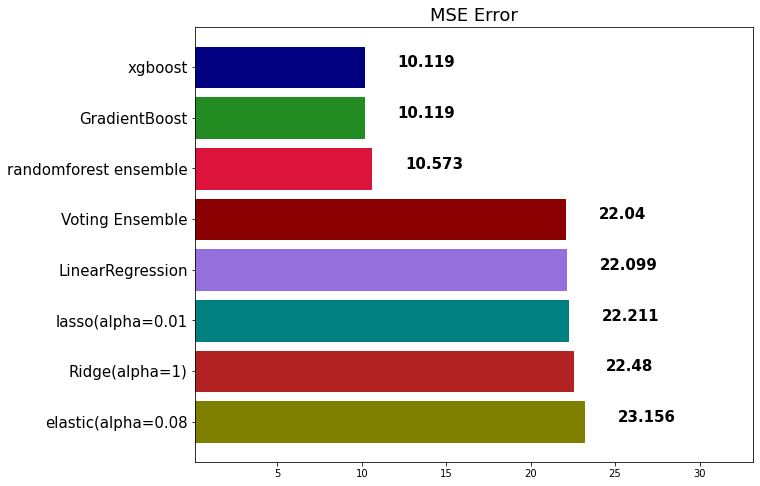

In [69]:
xgb = XGBRegressor(random_state=42)
xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)
mse_eval('xgboost', xgb_pred, y_test)
#

## Light GBM

* 사이킷런 패키지가 아님
* 성능이 우수
* 속도가 빠르다


In [70]:
from lightgbm import LGBMRegressor, LGBMClassifier

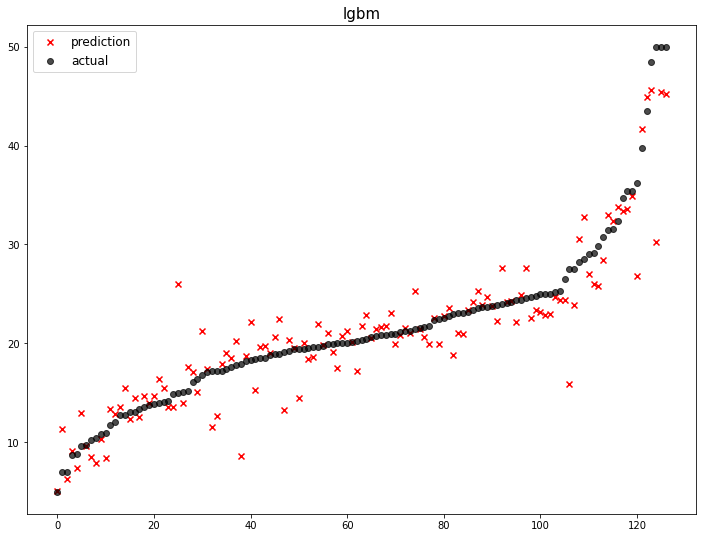

                   model        mse
0     elastic(alpha=0.08  23.156236
1         Ridge(alpha=1)  22.480476
2       lasso(alpha=0.01  22.210557
3       LinearRegression  22.098695
4        Voting Ensemble  22.040224
5                   lgbm  10.937726
6  randomforest ensemble  10.572810
7          GradientBoost  10.118980
8                xgboost  10.118980


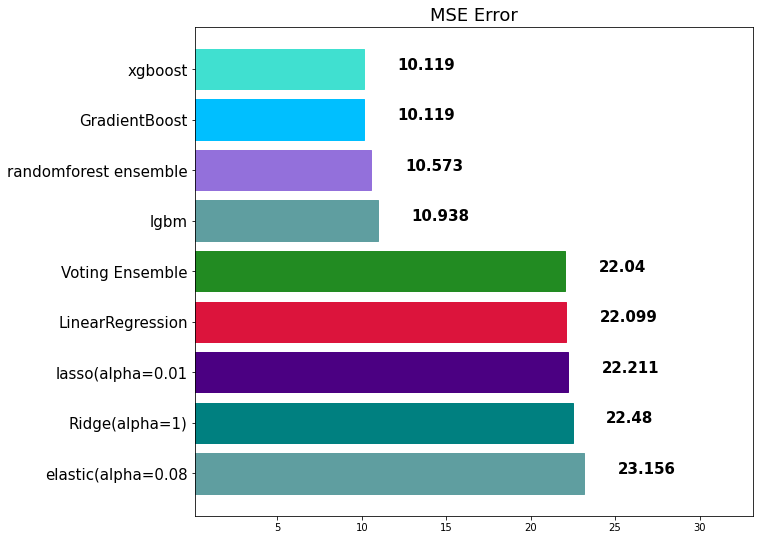

In [72]:
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(x_train, y_train)

lgbm_pred = lgbm.predict(x_test)
mse_eval('lgbm', lgbm_pred,y_test)

## AdaBoost

Adaptive + Boosting (적응형 부스팅 방식)
* LightGBM, XGBoost : GB에서 평가 방식을 튜닝한 모델
*학습률(learningrate)학습에 따라서 조절

AdaBoost
Adaptive + Boosting(적응형 부스팅 방식)

In [73]:
# n이 0.1일때 n이 줄어들수록 최소점을 찾아간다. 여기서 n을 조절해주는 것이 adaboost이다.
# 

In [74]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

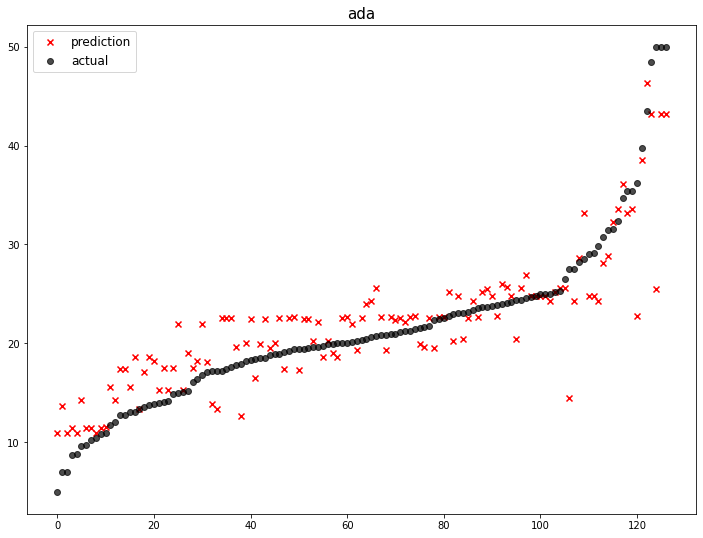

                   model        mse
0     elastic(alpha=0.08  23.156236
1         Ridge(alpha=1)  22.480476
2       lasso(alpha=0.01  22.210557
3       LinearRegression  22.098695
4        Voting Ensemble  22.040224
5                    ada  16.028607
6                   lgbm  10.937726
7  randomforest ensemble  10.572810
8          GradientBoost  10.118980
9                xgboost  10.118980


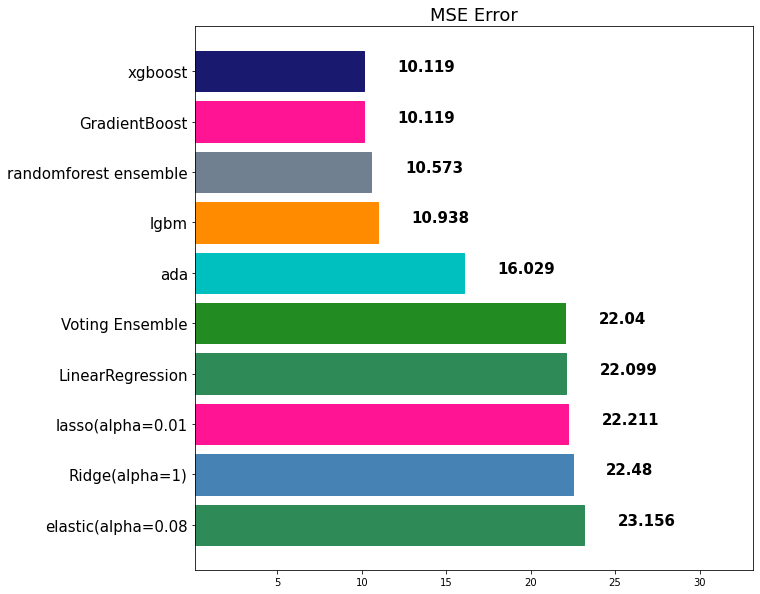

In [75]:
adr = AdaBoostRegressor(random_state=42)
adr.fit(x_train, y_train)

adr_pred = adr.predict(x_test)
mse_eval('ada',adr_pred, y_test)

## Stacking

개별 모델이 예측한 데이터를 기반으로 **final_estimator**가 종합해서 예측을 수행한다.

* 성능을 극한까지 끌어올리고 싶을 때 사용
*데이터 세트가 작을 경우 과대적합의 위험이 있다.

In [76]:
#estimator 이상의 모델
# 각결과물들을 가지고 새롭게 예측을 하는것
#스태택의 특징은 ensemble을 부하로 쓴다.
#스태킹은 자주쓰는 방법은 아니다.

In [84]:
from sklearn.ensemble import StackingClassifier, StackingRegressor


In [85]:
stack_models = [
                ('randomforest', rfr),
                ('gbr', gbr),
                ('lgbm',lgbm)
]

In [86]:
stack_reg = StackingRegressor(stack_models, final_estimator=xgb, n_jobs=-1)

[02:45:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


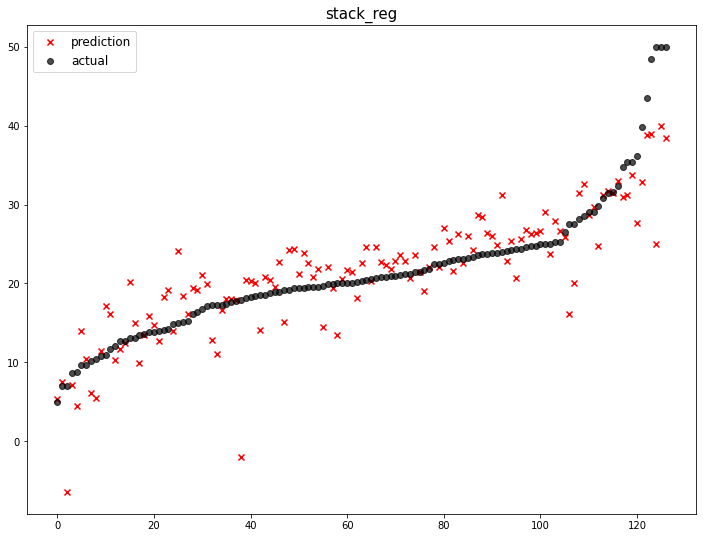

                    model        mse
0      elastic(alpha=0.08  23.156236
1               stack_reg  23.156236
2          Ridge(alpha=1)  22.480476
3        lasso(alpha=0.01  22.210557
4        LinearRegression  22.098695
5         Voting Ensemble  22.040224
6                     ada  16.028607
7                    lgbm  10.937726
8   randomforest ensemble  10.572810
9           GradientBoost  10.118980
10                xgboost  10.118980


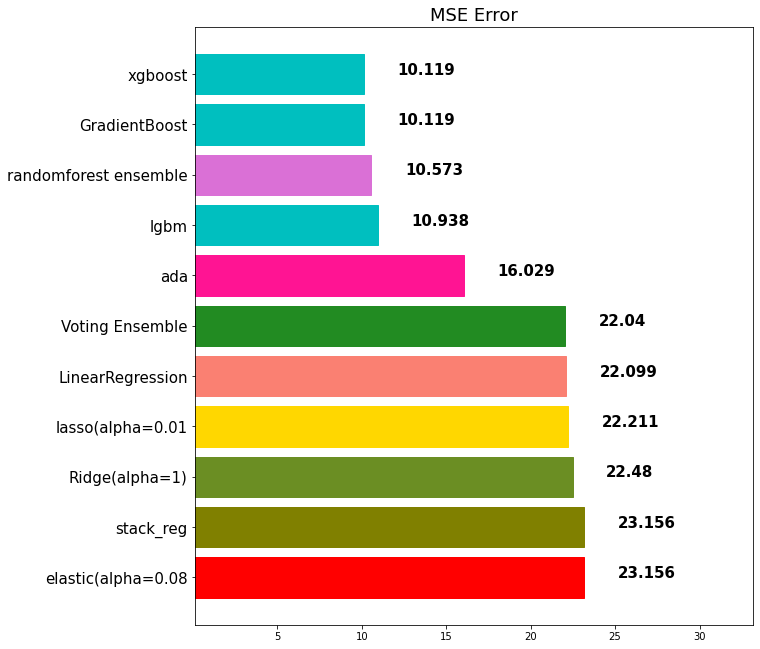

In [87]:
stack_reg.fit(x_train, y_train)
stack_pred = stack_reg.predict(x_test)

mse_eval('stack_reg', pred, y_test)

## Weighted Blending 
(모델링이 아니다.)

각 모델의 예측값에 대하여 **가중치(weight)**를 부여하여(곱하여) 최종 output 계산

* 모델에 대한 가중치를 조절하여 최종 output을 산출

* **모든 가중치으 ㅣ합은 1.0이 되도록 조절**



In [ ]:
#앙상블들의 모든결과들을 다시 앙상블 시키는 것이다.
# 데이터 분석 기법중에 하나

In [99]:
final_outputs = {
    'elastic' : pred,
    'randomforest' : rfr_pred,
    'gbr': gbr_pred,
    'xgb':xgb_pred,
    'lgbm': lgbm_pred,
    'stacking' : stack_pred
}

In [100]:
#final outputs가 나오면 가중치가 1이되게 랜덤한 숫자를 만들어야 될수도 있다.
#어떠한 모델에 가중치를 줄것인지 스스로 우리가 결정할 수 잇다. 랜덤하게는 잘 안한다.
#


In [105]:
final_prediction = final_outputs['elastic'] * 0.1\
+ final_outputs['randomforest'] *0.2\
+ final_outputs['gbr'] * 0.15\
+ final_outputs['xgb'] * 0.25\
+ final_outputs['lgbm'] * 0.1\
+ final_outputs['stacking']* 0.2\
#0.1프로만 주겠다. 코드가 길어지면 여러중에 나눠서 쓸거면 \
#제일 어울리는 것에 가중치를 많이 둔다.
#결과물들에 대한 앙상블

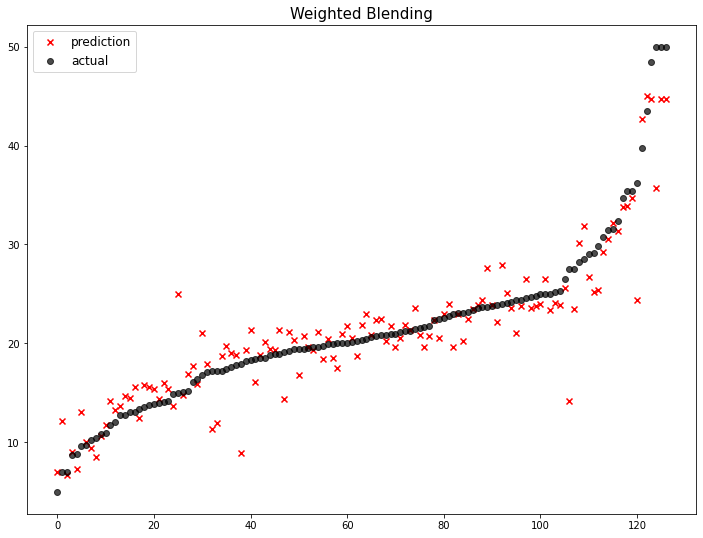

                    model        mse
0      elastic(alpha=0.08  23.156236
1               stack_reg  23.156236
2          Ridge(alpha=1)  22.480476
3        lasso(alpha=0.01  22.210557
4        LinearRegression  22.098695
5         Voting Ensemble  22.040224
6                     ada  16.028607
7                    lgbm  10.937726
8   randomforest ensemble  10.572810
9           GradientBoost  10.118980
10                xgboost  10.118980
11      Weighted Blending   9.794131


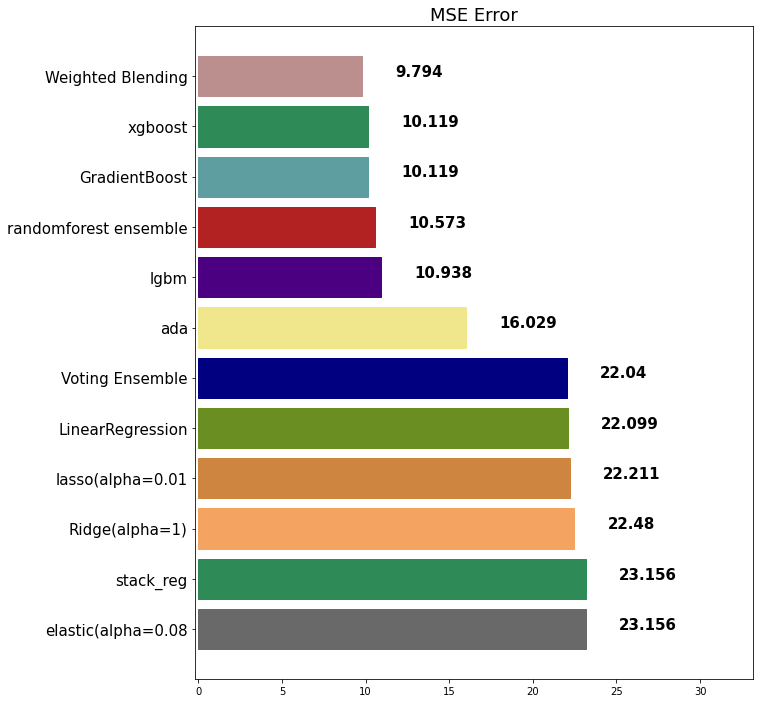

In [106]:
mse_eval("Weighted Blending", final_prediction, y_test)